In [1]:
import numpy as ny
import pandas as ps
import random
A = ny.random.randint(low = 1, high = 100, size = (45,))
B = ny.random.randint(low = 1, high = 100, size = (45,))
A, B

(array([18,  2, 50, 87, 75, 12, 38, 49, 40, 84, 92, 70,  1, 94, 37, 56, 11,
        96, 22,  6, 20, 11, 98, 25, 20, 90, 91, 86, 45, 40, 36, 73, 87, 69,
        31, 18,  9, 10,  4, 99, 14, 26, 81, 81, 81]),
 array([87, 21, 18, 37, 79, 45, 50, 60, 18,  7, 23, 64,  6, 28, 54, 81, 91,
        88, 61, 25, 25, 10,  9, 61, 74, 77, 56, 69, 33, 53, 53, 80, 43, 41,
        66, 79, 19, 80, 80, 21, 48,  7, 58, 59, 46]))

In [2]:
arr = ny.column_stack([A,B])
data = ps.DataFrame(arr, columns = ['First', 'Second'])
data.head(14)

,First,Second
0,18,87
1,2,21
2,50,18
3,87,37
4,75,79
5,12,45
6,38,50
7,49,60
8,40,18
9,84,7


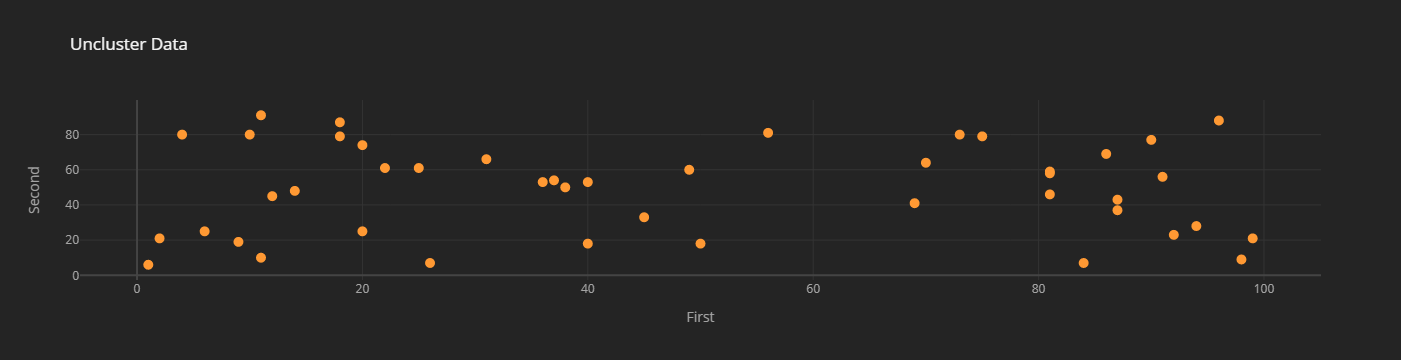

In [3]:
import cufflinks as cs
import plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
py.offline.init_notebook_mode(connected = True)
cs.go_offline()
data.iplot( x= 'First', y = 'Second', title = 'Uncluster Data', mode = 'markers', size = 10, xTitle = 'First', yTitle = 'Second')

In [4]:
cluster = 2
centroidrnd = (data.sample(cluster))
centroidrnd

,First,Second
7,49,60
14,37,54


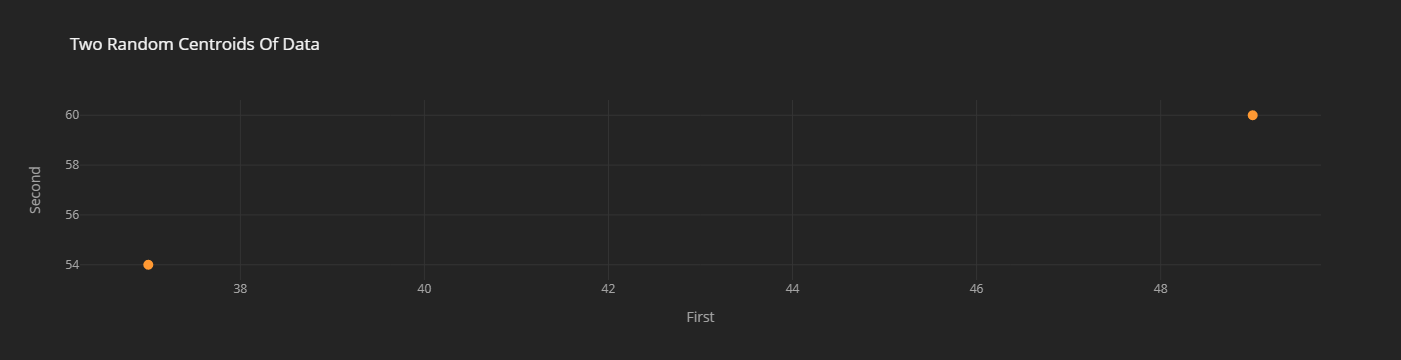

In [5]:
import plotly.express as px
import plotly.graph_objects as go
centroidrnd.iplot(kind = 'scatter', x = 'First', y = 'Second', title = 'Two Random Centroids Of Data', mode = 'markers', size = 10, xTitle = 'First', yTitle = 'Second')

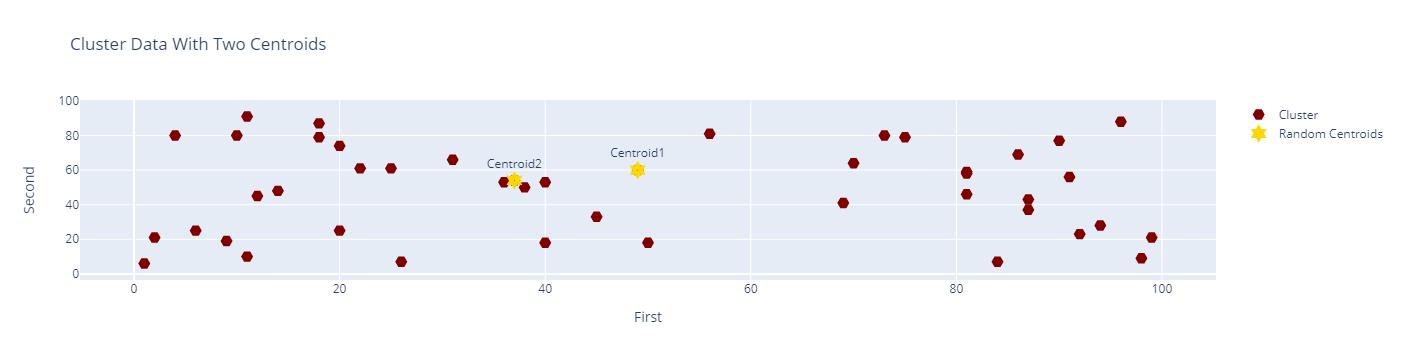

In [6]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = data['First'], y = data['Second'], mode = 'markers', name = 'Cluster', marker = dict(size = 12, color = 'maroon', symbol = 'hexagon2')))
fig.add_trace(go.Scatter(x = centroidrnd['First'], y = centroidrnd['Second'], mode = 'markers+text', name = 'Random Centroids', text=['Centroid1', 'Centroid2'], textposition="top center", marker = dict(size = 14, color = 'gold', symbol = 'hexagram-dot')))
fig.update_layout(title = "Cluster Data With Two Centroids", xaxis_title = 'First', yaxis_title = 'Second')
fig.show()

In [7]:
from math import sqrt
diff = 1
y = 0
while(diff != 0):
    x = data
    i = 1
    for index1, row_c in centroidrnd.iterrows():
        E = []
        for index2, row_d in x.iterrows():
            d1 = (row_c["First"]-row_d["Second"])**2
            d2 = (row_c["Second"]-row_d["Second"])**2
            d = sqrt(d1+d2)
            E.append(d)
        data[i] = E
        i = i + 1
    C = []
    for index, row in data.iterrows():
        min_dist = row[1]
        pos = 1
        for i in range(cluster):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos = i+1
        C.append(pos)
    data["Cluster"] = C
    centroidnew = data.groupby(["Cluster"]).mean()[["Second","First"]]
    if y == 0:
        diff = 1
        y = y + 1
    else:
        diff = (centroidnew['Second']-centroidrnd['Second']).sum()+(centroidnew['First']-centroidrnd['First']).sum()
        print(diff.sum())
    centroidnew = data.groupby(["Cluster"]).mean()[["Second","First"]]

0.0


In [8]:
centroidnew

,Second,First
Cluster,,
1,68.32,46.88
2,24.10,50.65


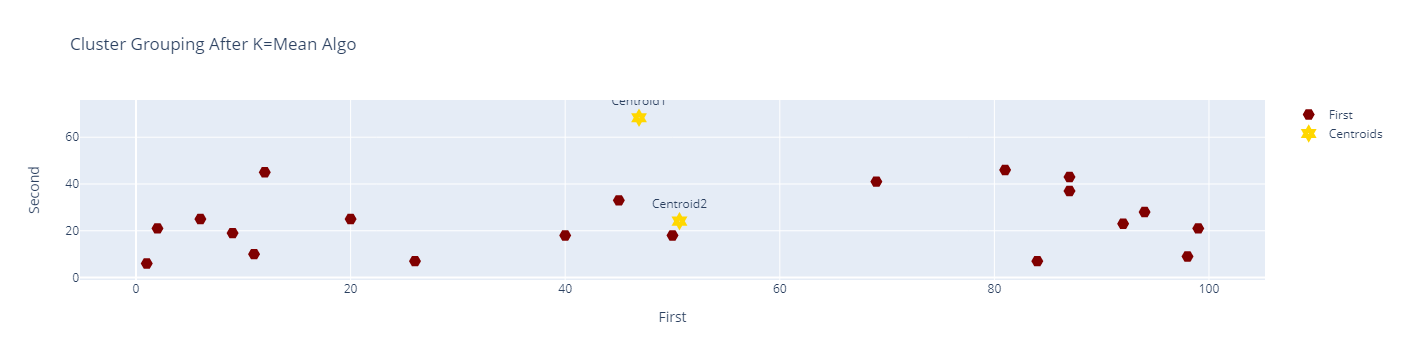

In [9]:
color = ['cyan', 'magneta']
for clstr in range(cluster):
    data = x[x['Cluster'] == clstr+1]
    fig = go.Figure()
    fig.add_trace(go.Scatter(x = data['First'], y = data['Second'], mode = 'markers', name = 'First', marker = dict(size = 12, color = 'maroon', symbol = 'hexagon2')))
fig.add_trace(go.Scatter(x = centroidnew['First'], y = centroidnew['Second'], mode = 'markers+text', name = 'Centroids', text=['Centroid1', 'Centroid2'], textposition="top center", marker = dict(size = 14, color = 'gold', symbol = 'hexagram-dot')))
fig.update_layout(title = "Cluster Grouping After K=Mean Algo", xaxis_title = 'First', yaxis_title = 'Second')
fig.show()

In [10]:
age = ny.random.randint(low = 21, high = 57, size = (45,))
salary = ny.random.randint(low = 60000, high = 120000, size = (45,))
arr1 = ny.column_stack([age,salary])
data1 = ps.DataFrame(arr1, columns = ['age', 'salary'])
data1.head(14)

,age,salary
0,34,83153
1,53,87107
2,41,118756
3,40,80245
4,49,115146
5,38,104511
6,41,73502
7,53,64126
8,39,88891
9,36,86029


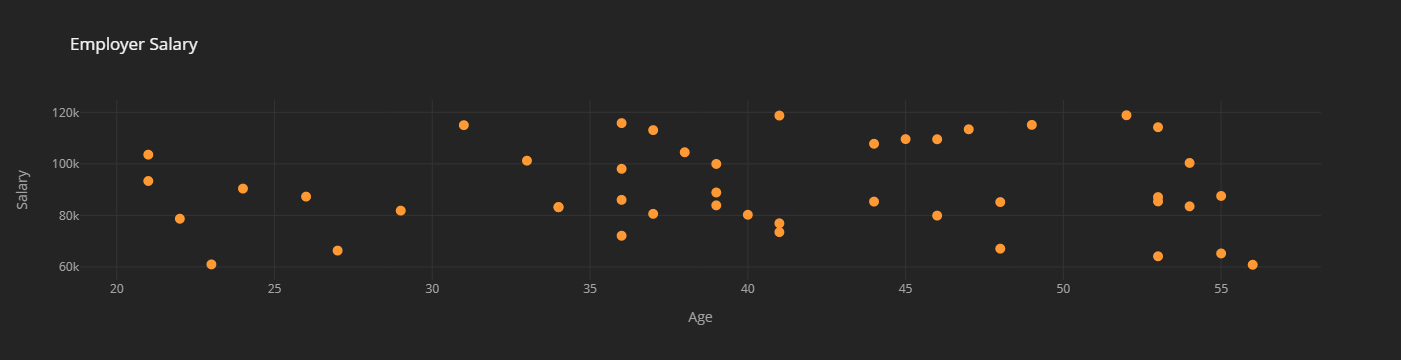

In [11]:
data1.iplot( x= 'age', y = 'salary', title = 'Employer Salary', mode = 'markers', size = 10, xTitle = 'Age', yTitle = 'Salary')

In [12]:
from sklearn.cluster import KMeans
km1 = KMeans(n_clusters = 3)
clustering1 = km1.fit_predict(data1[['age','salary']])
clustering1

array([2, 2, 0, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 0, 0, 1, 1, 2, 0, 2, 0, 2,
       2, 1, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 2, 0, 0, 1, 0,
       0])

In [13]:
km1.cluster_centers_

array([[4.12941176e+01, 1.09362765e+05],
       [4.23750000e+01, 6.62750000e+04],
       [3.87500000e+01, 8.44328500e+04]])

In [14]:
clustering1 = ps.DataFrame(clustering1)
# data1 = data1.join(predict1, how = 'left', lsuffix = 'left', rsuffix = 'right')
# data1 = ps.merge(data1, predict1, left_index=True, right_index=True)
data1First = ps.concat([data1, clustering1], axis=1)
data1First.head()

,age,salary,0
0,34,83153,2
1,53,87107,2
2,41,118756,0
3,40,80245,2
4,49,115146,0


In [15]:
data1First.rename(columns = {'age': 'age', 'salary':'salary', 0:'clusters'}, inplace = True)
# datatmp2 = datatmp1.columns.values[2] = "Prediction"
data1First.head()

,age,salary,clusters
0,34,83153,2
1,53,87107,2
2,41,118756,0
3,40,80245,2
4,49,115146,0


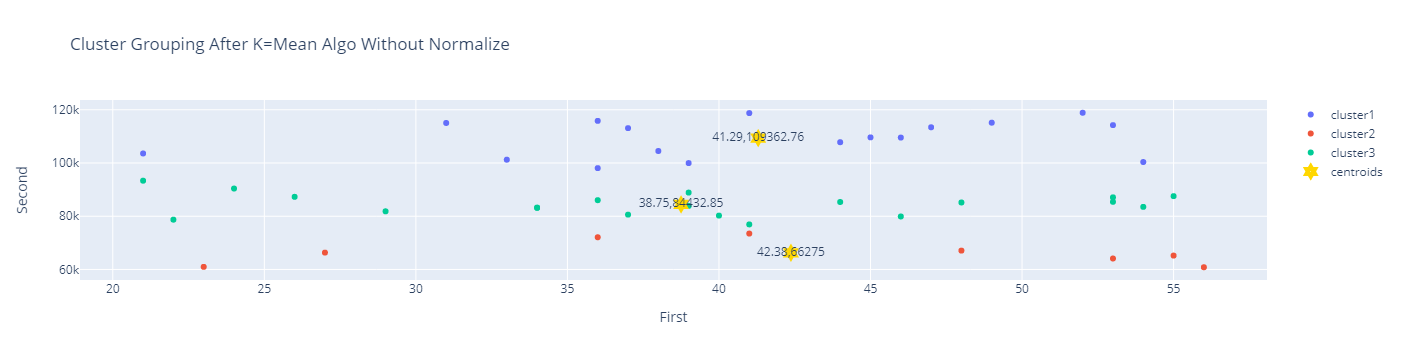

In [16]:
cluster1 = data1First[data1First.clusters == 0]
cluster2 = data1First[data1First.clusters == 1]
cluster3 = data1First[data1First.clusters == 2]
clusters = {'cluster1' : cluster1, 'cluster2': cluster2, 'cluster3' : cluster3}
fig = go.Figure()
for i in clusters:
    fig = fig.add_trace(go.Scatter(x = clusters[i]['age'], y = clusters[i]['salary'], name = i, mode = 'markers'))
fig = fig.add_trace(go.Scatter(x = km1.cluster_centers_[:, 0], y = km1.cluster_centers_[:, 1], mode = 'markers+text', text = ny.round(km1.cluster_centers_[:, 0:2], decimals = 2), name = 'centroids', marker = dict(size = 14, color = 'gold', symbol = 'hexagram-dot')))
fig.update_layout(title = "Cluster Grouping After K=Mean Algo Without Normalize", xaxis_title = 'First', yaxis_title = 'Second')
fig.show()

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data1[['salary']])
data1['salary'] = scaler.transform(data1[['salary']])
scaler.fit(data1[['age']])
data1['age'] = scaler.transform(data1[['age']])
data1

,age,salary
0,0.371429,0.384450
1,0.914286,0.452570
2,0.571429,0.997829
3,0.542857,0.334350
4,0.800000,0.935635
5,0.485714,0.752412
6,0.571429,0.218179
7,0.914286,0.056647
8,0.514286,0.483306
9,0.428571,0.433998


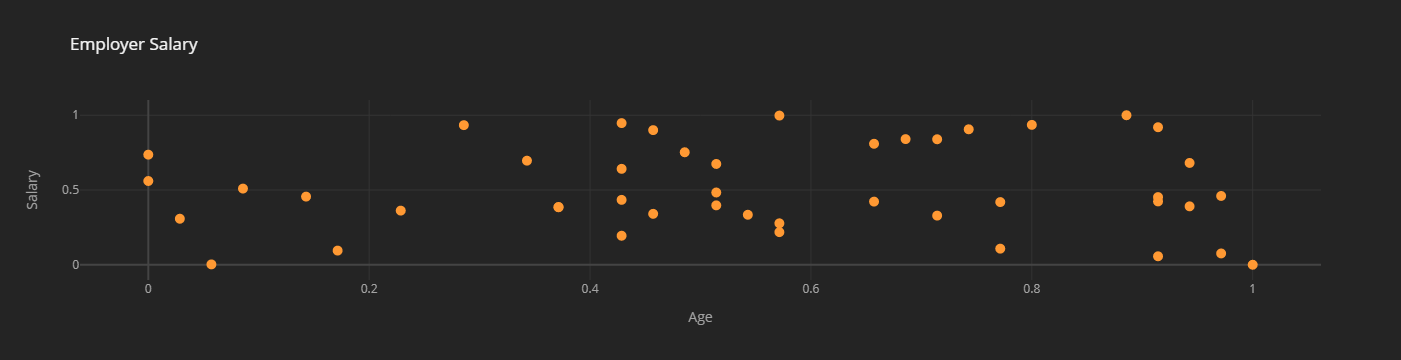

In [18]:
data1.iplot( x= 'age', y = 'salary', title = 'Employer Salary', mode = 'markers', size = 10, xTitle = 'Age', yTitle = 'Salary')

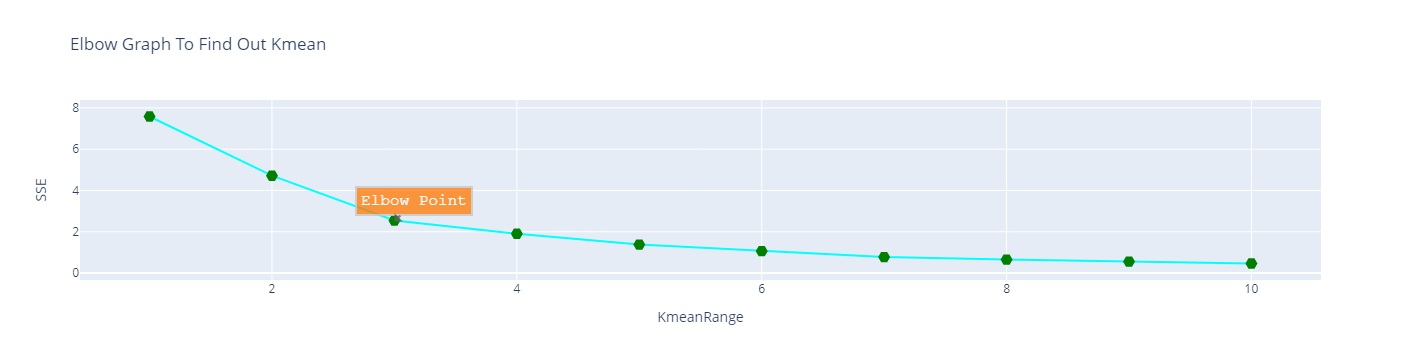

In [19]:
sse = []
kmnrng = range(1,11)
for k in kmnrng:
    km = KMeans(n_clusters = k)
    km.fit(data1[['age', 'salary']])
    sse.append(km.inertia_)
sse = ps.DataFrame(sse)
sse.rename(columns = {0:'SSE'}, inplace = True)
kmnrng = ps.DataFrame(kmnrng)
kmnrng.rename(columns = {0:'Kmean'}, inplace = True)
kmnelbw = ps.concat([kmnrng, sse], axis=1)
fig = go.Figure()
fig = fig.add_trace(go.Scatter(x = kmnelbw['Kmean'], y = kmnelbw['SSE'], mode = 'lines+markers', name = 'ElbowLine', line = dict(color = 'cyan'), textposition="top right", marker = dict(size = 12, color = 'green', symbol = 'hexagon2')))
fig.add_annotation(x = 3, y = 2.5, xref = "x", yref = "y", text = "Elbow Point", showarrow = True, font=dict(family = "Courier New, monospace", size=16, color="#ffffff"),
                align = "center", arrowhead = 1, arrowsize = 1, arrowwidth = 2, arrowcolor = "#636363",  ax=20, ay =-20, bordercolor = "#c7c7c7", borderwidth = 2, borderpad = 4, bgcolor = "#ff7f0e", opacity = 0.8)
fig.update_layout(title = "Elbow Graph To Find Out Kmean", xaxis_title = 'KmeanRange', yaxis_title = 'SSE')
fig.show()

In [20]:
from sklearn.cluster import KMeans
km2 = KMeans(n_clusters = 3)
clustering2 = km2.fit_predict(data1[['age','salary']])
clustering2

array([1, 2, 0, 2, 0, 0, 2, 2, 1, 1, 2, 1, 2, 1, 0, 1, 2, 2, 0, 1, 0, 2,
       1, 1, 2, 0, 1, 1, 2, 0, 0, 2, 1, 0, 0, 2, 1, 0, 1, 1, 0, 1, 2, 1,
       0])

In [21]:
km2.cluster_centers_

array([[0.64897959, 0.86698884],
       [0.26890756, 0.41098234],
       [0.80204082, 0.28334293]])

In [22]:
clustering2 = ps.DataFrame(clustering2)
# data1 = data1.join(predict1, how = 'left', lsuffix = 'left', rsuffix = 'right')
# data1 = ps.merge(data1, predict1, left_index=True, right_index=True)
data1second = ps.concat([data1, clustering2], axis=1)
data1second.rename(columns = {'age': 'age', 'salary':'salary', 0:'clusters'}, inplace = True)
data1second.head()

,age,salary,clusters
0,0.371429,0.384450,1
1,0.914286,0.452570,2
2,0.571429,0.997829,0
3,0.542857,0.334350,2
4,0.800000,0.935635,0


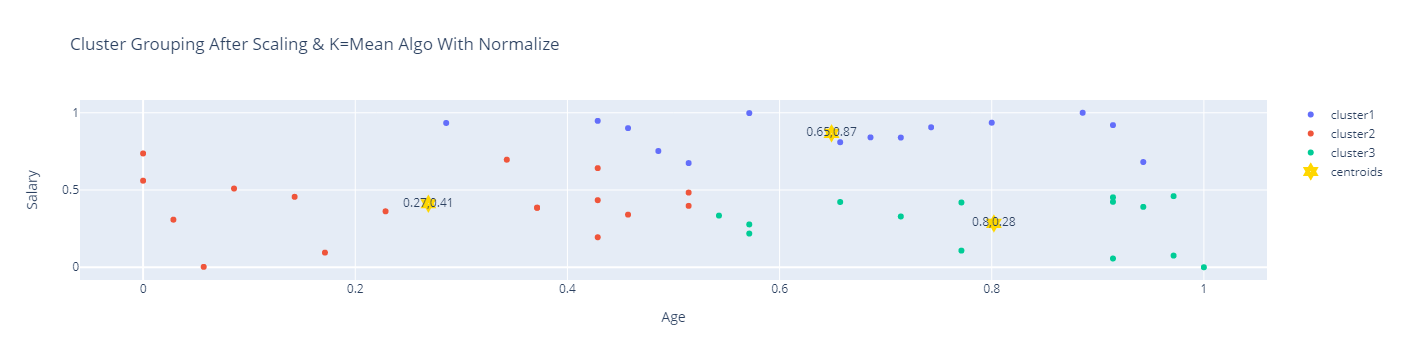

In [23]:
cluster1 = data1second[data1second.clusters == 0]
cluster2 = data1second[data1second.clusters == 1]
cluster3 = data1second[data1second.clusters == 2]
clusters = {'cluster1' : cluster1, 'cluster2' : cluster2, 'cluster3': cluster3}
fig = go.Figure()
for i in clusters:
    fig = fig.add_trace(go.Scatter(x = clusters[i]['age'], y = clusters[i]['salary'], name = i, mode = 'markers'))
fig = fig.add_trace(go.Scatter(x = km2.cluster_centers_[:, 0], y = km2.cluster_centers_[:, 1], mode = 'markers+text', text = ny.round(km2.cluster_centers_[:, 0:2], decimals = 2), name = 'centroids', marker = dict(size = 14, color = 'gold', symbol = 'hexagram-dot')))
# fig.add_annotation(x = 3, y = 2, xref = "x", yref = "y", text = "Elbow Point", showarrow = True, font=dict(family = "Courier New, monospace", size=16, color="#ffffff"),
#                 align="center", arrowhead=2, arrowsize=1, arrowwidth=2, arrowcolor="#636363",  ax=20, ay=-30, bordercolor="#c7c7c7", borderwidth=2, borderpad=4, bgcolor="#ff7f0e", opacity=0.8)
fig.update_layout(title = "Cluster Grouping After Scaling & K=Mean Algo With Normalize", xaxis_title = 'Age', yaxis_title = 'Salary')
fig.show()

In [24]:
data2 = ps.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep = ';')
data2.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [25]:
data2.shape

(1599, 12)

In [26]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [27]:
data2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [28]:
data2.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [29]:
data2['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [30]:
qual3 = data2[data2.quality == 3]
qual4 = data2[data2.quality == 4]
qual5 = data2[data2.quality == 5]
qual6 = data2[data2.quality == 6]
qual7 = data2[data2.quality == 7]
qual8 = data2[data2.quality == 8]
qual = {'qual3':qual3, 'qual4':qual4, 'qual5':qual5, 'qual6':qual6, 'qual7':qual7, 'qual8':qual8}

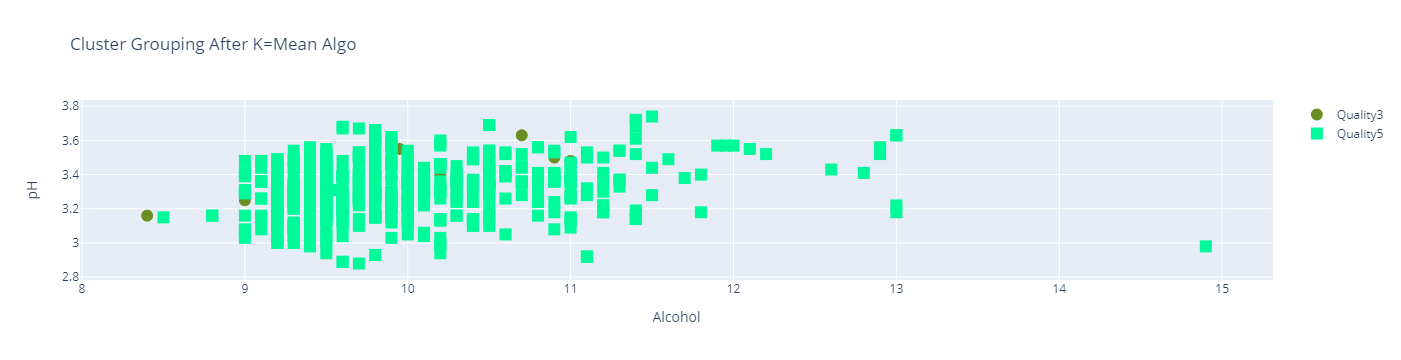

In [31]:
import cufflinks as cs
import plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
py.offline.init_notebook_mode(connected = True)
import plotly.express as px
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x = qual3['alcohol'], y = qual3['pH'], mode = 'markers', name = 'Quality3', marker = dict(size = 12, color = 'olivedrab', symbol = 'circle')))
fig.add_trace(go.Scatter(x = qual5['alcohol'], y = qual5['pH'], mode = 'markers', name = 'Quality5', marker = dict(size = 12, color = 'mediumspringgreen', symbol = 'square')))
fig.update_layout(title = "Cluster Grouping After K=Mean Algo", xaxis_title = 'Alcohol', yaxis_title = 'pH')
fig.show()

In [32]:
scaler = MinMaxScaler()
scaler.fit(data2[['alcohol']])
data2['alcohol'] = scaler.transform(data2[['alcohol']])
scaler.fit(data2[['quality']])
data2['quality'] = scaler.transform(data2[['quality']])
data2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,0.153846,0.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,0.215385,0.4
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,0.215385,0.4
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,0.215385,0.6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,0.153846,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,0.323077,0.4
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,0.430769,0.6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,0.400000,0.6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,0.276923,0.4


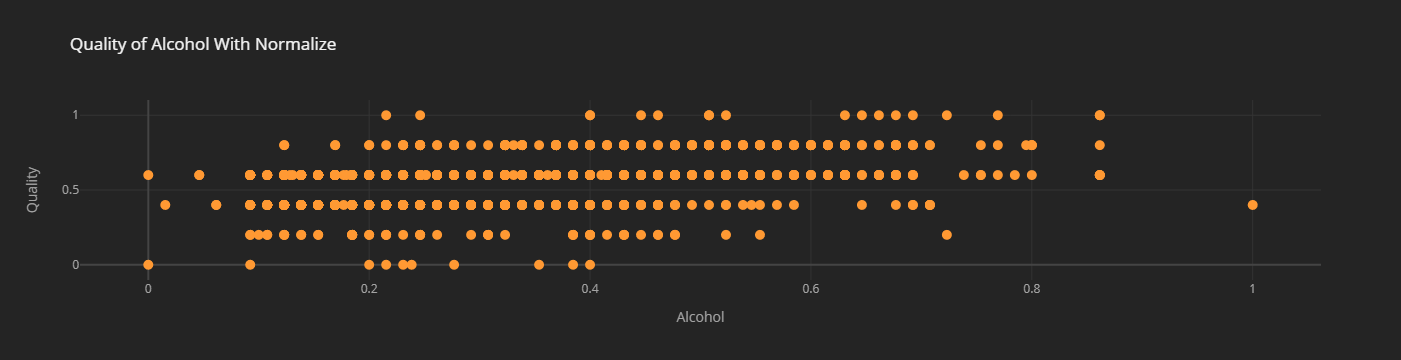

In [33]:
data2.iplot( x= 'alcohol', y = 'quality', title = 'Quality of Alcohol With Normalize', mode = 'markers', size = 10, xTitle = 'Alcohol', yTitle = 'Quality')

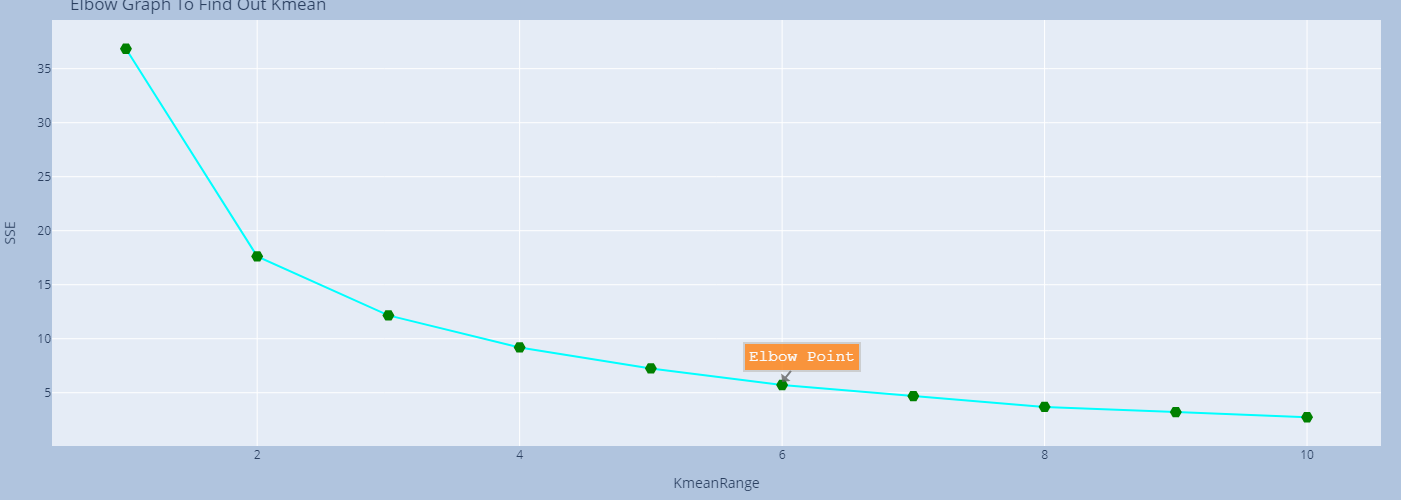

In [34]:
data2 = data2.sample(n = 700)
sse = []
kmnrng = range(1,11)
for k in kmnrng:
    km = KMeans(n_clusters = k)
    km.fit(data2[['alcohol', 'quality']])
    sse.append(km.inertia_)
sse = ps.DataFrame(sse)
sse.rename(columns = {0:'SSE'}, inplace = True)
kmnrng = ps.DataFrame(kmnrng)
kmnrng.rename(columns = {0:'Kmean'}, inplace = True)
kmnelbw = ps.concat([kmnrng, sse], axis=1)
fig = go.Figure()
fig = fig.add_trace(go.Scatter(x = kmnelbw['Kmean'], y = kmnelbw['SSE'], mode = 'lines+markers', name = 'ElbowLine', line = dict(color = 'cyan'), textposition="top right", marker = dict(size = 12, color = 'green', symbol = 'hexagon2')))
fig.add_annotation(x = 6, y = 6, xref = "x", yref = "y", text = "Elbow Point", showarrow = True, font=dict(family = "Courier New, monospace", size=16, color="#ffffff"),
                align = "center", arrowhead = 1, arrowsize = 1, arrowwidth = 2, arrowcolor = "#636363",  ax=20, ay =-25, bordercolor = "#c7c7c7", borderwidth = 2, borderpad = 4, bgcolor = "#ff7f0e", opacity = 0.8)
fig.update_layout(title = "Elbow Graph To Find Out Kmean", xaxis_title = 'KmeanRange', yaxis_title = 'SSE', margin=dict(l=20, r=20, t=20, b=20), paper_bgcolor="LightSteelBlue", autosize=False, width=500, height=500)
fig.show()

In [35]:
km3 = KMeans(n_clusters = 3)
clustering3 = km3.fit_predict(data2[['alcohol','quality']])
clustering3

array([1, 1, 1, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2, 2, 1, 2, 0, 2, 1, 1, 2, 1,
       1, 0, 2, 1, 2, 1, 1, 1, 2, 0, 1, 0, 1, 2, 2, 2, 0, 2, 1, 1, 1, 1,
       2, 0, 2, 1, 2, 2, 0, 0, 2, 1, 0, 2, 0, 0, 1, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 2, 2, 0, 0, 1, 1, 0, 2, 1, 2, 1, 1, 0, 1, 0, 2, 1, 1, 1,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1, 2,
       0, 1, 0, 2, 0, 1, 2, 2, 2, 0, 0, 2, 1, 2, 1, 2, 2, 1, 1, 0, 0, 2,
       0, 1, 0, 1, 2, 2, 1, 0, 2, 0, 0, 1, 2, 0, 0, 0, 1, 0, 2, 1, 1, 2,
       0, 0, 0, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 0, 0, 1, 1, 0, 2,
       1, 0, 0, 2, 0, 1, 1, 0, 1, 0, 2, 1, 0, 2, 1, 1, 0, 2, 1, 1, 2, 2,
       1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 2, 1, 0, 2, 1,
       0, 1, 2, 1, 1, 2, 1, 0, 1, 2, 2, 1, 2, 1, 1, 0, 2, 1, 0, 0, 2, 1,
       2, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1,
       1, 0, 0, 1, 2, 2, 2, 1, 0, 0, 1, 2, 0, 2, 1, 2, 2, 1, 1, 1, 2, 1,
       1, 0, 1, 2, 2, 2, 2, 1, 0, 1, 1, 2, 2, 0, 2,

In [36]:
km3.cluster_centers_

array([[0.5309304 , 0.68571429],
       [0.22153348, 0.37799353],
       [0.25522317, 0.61851852]])

In [37]:
clustering3 = ps.DataFrame(clustering3)
# data2 = data2.join(clustering3, how = 'left', lsuffix = 'left', rsuffix = 'right')
# data2 = ps.merge(data2, clustering, left_index=True, right_index=True)
data2.reset_index(inplace = True)
result = ps.concat([data2, clustering3], axis=1)
result.rename(columns = {'index':'SampleRows', 'fixed acidigy':'FixAcidity', 'volatile acidity':'VolatileAcidity', 'citric acid':'CitricAcid', 'residual sugar':'ResidualSugar',
                             'chlorides':'Chlorides', 'free sulfur dioxide':'FreeSulfurDioxide', 'total sulfur dioxide':'TotalSulfurDioxide', 'density':'Denisty',
                             'pH':'PH', 'sulphates':'Sulphates', 'alcohol':'Alcohol', 'quality':'Quality', 0:'Clusters'}, inplace = True)
# # datatmp2 = datatmp1.columns.values[2] = "Prediction"
result.head(15)

,SampleRows,fixed acidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Denisty,PH,Sulphates,Alcohol,Quality,Clusters
0,1370,8.7,0.780,0.51,1.7,0.415,12.0,66.0,0.99623,3.00,1.17,0.123077,0.4,1
1,899,8.3,1.020,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,0.400000,0.0,1
2,1568,7.0,0.560,0.13,1.6,0.077,25.0,42.0,0.99629,3.34,0.59,0.123077,0.4,1
3,361,8.6,0.450,0.31,2.6,0.086,21.0,50.0,0.99820,3.37,0.91,0.230769,0.6,2
4,1286,7.1,0.160,0.44,2.5,0.068,17.0,31.0,0.99328,3.35,0.54,0.615385,0.6,0
5,875,8.8,0.310,0.40,2.8,0.109,7.0,16.0,0.99614,3.31,0.79,0.523077,0.8,0
6,254,7.1,0.600,0.00,1.8,0.074,16.0,34.0,0.99720,3.47,0.70,0.230769,0.6,2
7,776,6.9,0.765,0.18,2.4,0.243,5.5,48.0,0.99612,3.40,0.60,0.292308,0.6,2
8,1018,8.0,0.180,0.37,0.9,0.049,36.0,109.0,0.99007,2.89,0.44,0.661538,0.6,0
9,1575,7.5,0.520,0.40,2.2,0.060,12.0,20.0,0.99474,3.26,0.64,0.523077,0.6,0


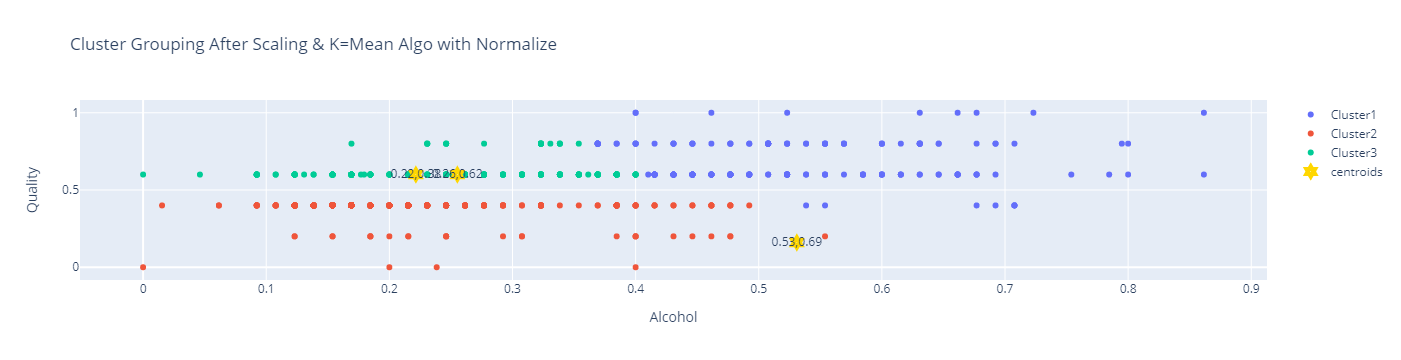

In [38]:
Cluster1 = result[result.Clusters == 0]
Cluster2 = result[result.Clusters == 1]
Cluster3 = result[result.Clusters == 2]
clusters = {'Cluster1':Cluster1, 'Cluster2':Cluster2, 'Cluster3':Cluster3}
fig = go.Figure()
for i in clusters:
    fig = fig.add_trace(go.Scatter(x = clusters[i]['Alcohol'], y = clusters[i]['Quality'], name = i, mode = 'markers'))
fig = fig.add_trace(go.Scatter(x = km3.cluster_centers_[:, 0], y = km.cluster_centers_[:, 1], mode = 'markers+text', text = ny.round(km3.cluster_centers_[:, 0:2], decimals = 2), name = 'centroids', marker = dict(size = 14, color = 'gold', symbol = 'hexagram-dot')))
# fig.add_annotation(x = 3, y = 2, xref = "x", yref = "y", text = "Elbow Point", showarrow = True, font=dict(family = "Courier New, monospace", size=16, color="#ffffff"),
#                 align="center", arrowhead=2, arrowsize=1, arrowwidth=2, arrowcolor="#636363",  ax=20, ay=-30, bordercolor="#c7c7c7", borderwidth=2, borderpad=4, bgcolor="#ff7f0e", opacity=0.8)
fig.update_layout(title = "Cluster Grouping After Scaling & K=Mean Algo with Normalize", xaxis_title = 'Alcohol', yaxis_title = 'Quality')
fig.show()